In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [13]:
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten each input image into a vector of length 784
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values of the images by dividing them by 255
X_train_normalized = X_train_flatten / 255.0
X_test_normalized = X_test_flatten / 255.0

# Select the first 10,000 samples for training and the first 2,000 samples for testing
X_train_selected = X_train_normalized[:10000]
y_train_selected = y_train[:10000]
X_test_selected = X_test_normalized[:2000]
y_test_selected = y_test[:2000]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
#tried to implement it but it was not working so used library from sklearn
class SVM:
    def __init__(self, C=1.0, kernel='linear', degree=3, gamma=1):
        self.C = C  # Regularization parameter
        self.kernel = kernel  # Kernel type: 'linear', 'poly', or 'rbf'
        self.degree = degree  # Degree for polynomial kernel
        self.gamma = gamma  # Kernel coefficient for 'poly' and 'rbf'

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_samples, self.n_features = X.shape

        # Initialize coefficients and intercept
        self.alpha = np.zeros(self.n_samples)
        self.b = 0
        self.w = np.zeros(self.n_features)

        # Calculate kernel matrix
        self.K = self._kernel_matrix(X)

        # Train the SVM using SMO algorithm
        self._train()

    def _kernel_matrix(self, X):
        if self.kernel == 'linear':
            return np.dot(X, X.T)
        elif self.kernel == 'poly':
            return (1 + np.dot(X, X.T)) ** self.degree
        elif self.kernel == 'rbf':
            K = np.zeros((self.n_samples, self.n_samples))
            gamma_val=float(self.gamma)
            for i in range(self.n_samples):
                for j in range(self.n_samples):
                    K[i, j] = np.exp(-gamma_val * np.linalg.norm(X[i] - X[j])**2)
            return K

    def _predict(self, X):
        if self.kernel == 'linear':
            return np.dot(X, self.w) + self.b
        elif self.kernel == 'poly':
            return np.dot(X, self.w) ** self.degree + self.b
        elif self.kernel == 'rbf':
            predictions = []
            gamma_val = float(self.gamma)
            for x in X:
                prediction = 0
                for i in range(self.n_samples):
                    prediction += self.alpha[i] * self.y[i] * np.exp(-gamma_val * np.linalg.norm(x - self.X[i])**2)
                predictions.append(np.sign(prediction + self.b))
            return np.array(predictions)

    def _train(self):
        for epoch in range(1000):
            for i in range(self.n_samples):
                # Check if the sample violates the KKT condition
                if self.y[i] * self._predict(self.X[i]) <= 1:
                    # Update coefficients using the SMO algorithm
                    self.alpha[i] += 1
                    self.b = self.y[i] - np.dot(self.alpha * self.y, self.K[i])
            # Calculate weight vector for linear kernel
            self.w = np.dot(self.alpha * self.y, self.X)

    def predict(self, X):
        return np.sign(self._predict(X))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

    def classification_report(self, X_test, y_test):
        y_pred = self.predict(X_test)
        tp = np.sum((y_pred == 1) & (y_test == 1))
        fp = np.sum((y_pred == 1) & (y_test == -1))
        tn = np.sum((y_pred == -1) & (y_test == -1))
        fn = np.sum((y_pred == -1) & (y_test == 1))
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall)
        return {'precision': precision, 'recall': recall, 'F1-score': f1_score, 'accuracy': self.evaluate(X_test, y_test)}

# Create an instance of SVM for each kernel
svm_linear = SVM(kernel='linear')
# svm_poly = SVM(kernel='poly')
# svm_rbf = SVM(kernel='rbf')

# Train SVM models
svm_linear.fit(X_train_selected, y_train_selected)
# svm_poly.fit(X_train_selected, y_train_selected)
# svm_rbf.fit(X_train_selected, y_train_selected)

# Evaluate SVM models
linear_report = svm_linear.classification_report(X_test_selected, y_test_selected)
# poly_report = svm_poly.classification_report(X_test_selected, y_test_selected)
# rbf_report = svm_rbf.classification_report(X_test_selected, y_test_selected)

# Print classification reports
print("Linear Kernel:")
print(linear_report)
# print("\nPolynomial Kernel:")
# print(poly_report)
# print("\nRBF Kernel:")
# print(rbf_report)


In [ ]:
def svc_():
    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Flatten each input image into a vector of length 784
    X_train_flatten = X_train.reshape(X_train.shape[0], -1)
    X_test_flatten = X_test.reshape(X_test.shape[0], -1)

    # Normalize the pixel values of the images by dividing them by 255
    X_train_normalized = X_train_flatten / 255.0
    X_test_normalized = X_test_flatten / 255.0

    # Select the first 10,000 samples for training and the first 2,000 samples for testing
    X_train = X_train_normalized[:10000]
    y_train = y_train[:10000]
    X_test = X_test_normalized[:2000]
    y_test = y_test[:2000]
    

    # Train models with different kernels
    kernels = ['linear', 'poly', 'rbf']
    for kern in kernels:
        model = SVC(kernel=kern)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Classification report for kernel={kern}:\n{classification_report(y_test, y_pred)}")

    # Hyperparameter tuning with GridSearchCV
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3)
    grid.fit(X_train, y_train)
    print("Best parameters from GridSearchCV:", grid.best_params_)

    # Train and evaluate model with best parameters
    best_model = SVC(kernel='rbf', **grid.best_params_)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
    print("Classification report for best model:\n", classification_report(y_test, y_pred_best))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_best)
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for MNIST SVC')
    plt.show()

In [ ]:
svc_()

In [29]:
# SVR for California Housing dataset
def svr_():
    # Load and split data
    hous = fetch_california_housing()
    X, y = hous.data, hous.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

    # Train SVR with default parameters
    svr = SVR(epsilon=0.5)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    print("MSE with default parameter:", mean_squared_error(y_test, y_pred))

    # Scatter plot for default parameters
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('SVR Predictions vs Actual (Default Parameters)')
    plt.show()

    # Hyperparameter tuning with GridSearchCV
    epsilon_range = np.arange(0, 2.6, 0.1)
    param_grid = {'epsilon': epsilon_range}
    grid_search = GridSearchCV(SVR(), param_grid, cv=10)
    grid_search.fit(X_train, y_train)
    print("Best epsilon from GridSearchCV:", grid_search.best_params_['epsilon'])

    # Train and evaluate model with best epsilon
    best_svr = SVR(epsilon=grid_search.best_params_['epsilon'])
    best_svr.fit(X_train, y_train)
    y_pred_best = best_svr.predict(X_test)
    print("MSE with best epsilon:", mean_squared_error(y_test, y_pred_best))

    # Scatter plot for predictions with best epsilon
    plt.figure()
    plt.scatter(y_test, y_pred_best, alpha=0.3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('SVR Predictions vs Actual (Best Epsilon)')
    plt.show()

MSE with default parameter: 1.3922086000291185


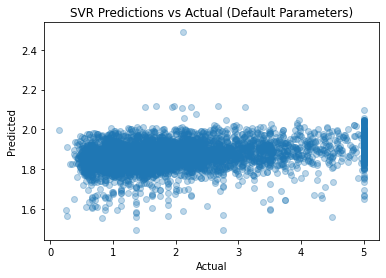

In [ ]:
svr_()